In [9]:
!pip install google-play-scraper

In [10]:
from google_play_scraper import app

import pandas as pd

import numpy as np

**1. SCRAPING DATA**

In [11]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.instagram.barcelona',
    lang='id',
    country='id',
    sort=Sort.NEWEST,
    count=1000,
    filter_score_with=None
)

In [12]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,b50dc4fd-bf02-4f9d-aaf5-f36760c849fb,Supriyanto Supri,https://play-lh.googleusercontent.com/a-/ALV-U...,Bagus banget,5,0,338.1.0.32.109,2024-07-17 01:22:22,None,None,338.1.0.32.109
1,39ea68c9-088f-4409-a511-ab81fa94ab68,Selia Jarka Anisa,https://play-lh.googleusercontent.com/a-/ALV-U...,kgn yusak☹️,5,0,340.0.0.21.109,2024-07-16 17:13:37,None,None,340.0.0.21.109
2,6a5591ae-2160-4eba-a27f-611ae2e5d976,Erni kurniasih Bt fuad majid,https://play-lh.googleusercontent.com/a-/ALV-U...,pengguna baru,5,0,339.0.0.29.109,2024-07-16 14:46:37,None,None,339.0.0.29.109
3,97ae01e9-9694-42f8-ac79-3bf0c97d28c5,Ahmad Yulianto,https://play-lh.googleusercontent.com/a/ACg8oc...,Tambahkan kualitas ultra tinggi video dengan b...,5,0,None,2024-07-16 12:37:33,None,None,None
4,3363dc00-77d3-41ac-8f9f-3e33792c245b,Sani Nurfauziah,https://play-lh.googleusercontent.com/a-/ALV-U...,masih belom mengerti jd baru mencoba nya,4,0,339.0.0.29.109,2024-07-16 12:18:49,None,None,339.0.0.29.109


In [13]:
len(df_busu.index)

1000

In [14]:
df_busu[['userName', 'score','at', 'content']].head()

,userName,score,at,content
0,Supriyanto Supri,5,2024-07-17 01:22:22,Bagus banget
1,Selia Jarka Anisa,5,2024-07-16 17:13:37,kgn yusak☹️
2,Erni kurniasih Bt fuad majid,5,2024-07-16 14:46:37,pengguna baru
3,Ahmad Yulianto,5,2024-07-16 12:37:33,Tambahkan kualitas ultra tinggi video dengan b...
4,Sani Nurfauziah,4,2024-07-16 12:18:49,masih belom mengerti jd baru mencoba nya


In [15]:
new_df = df_busu[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False)
sorted_df.head()

,userName,score,at,content
0,Supriyanto Supri,5,2024-07-17 01:22:22,Bagus banget
1,Selia Jarka Anisa,5,2024-07-16 17:13:37,kgn yusak☹️
2,Erni kurniasih Bt fuad majid,5,2024-07-16 14:46:37,pengguna baru
3,Ahmad Yulianto,5,2024-07-16 12:37:33,Tambahkan kualitas ultra tinggi video dengan b...
4,Sani Nurfauziah,4,2024-07-16 12:18:49,masih belom mengerti jd baru mencoba nya


In [16]:
my_df = sorted_df[['userName', 'score','at', 'content']]

In [17]:
my_df.head()

,userName,score,at,content
0,Supriyanto Supri,5,2024-07-17 01:22:22,Bagus banget
1,Selia Jarka Anisa,5,2024-07-16 17:13:37,kgn yusak☹️
2,Erni kurniasih Bt fuad majid,5,2024-07-16 14:46:37,pengguna baru
3,Ahmad Yulianto,5,2024-07-16 12:37:33,Tambahkan kualitas ultra tinggi video dengan b...
4,Sani Nurfauziah,4,2024-07-16 12:18:49,masih belom mengerti jd baru mencoba nya


In [18]:
my_df.to_csv("scrapped_data.csv", index = False)

In [19]:
def labelbaru(score):
  if score <3:
    return 'Negatif'
  elif score == 4:
    return 'Positif'
  elif score == 5:
    return 'Positif'

my_df['Label'] = my_df['score'].apply(labelbaru)
my_df.head(10)

,userName,score,at,content,Label
0,Supriyanto Supri,5,2024-07-17 01:22:22,Bagus banget,Positif
1,Selia Jarka Anisa,5,2024-07-16 17:13:37,kgn yusak☹️,Positif
2,Erni kurniasih Bt fuad majid,5,2024-07-16 14:46:37,pengguna baru,Positif
3,Ahmad Yulianto,5,2024-07-16 12:37:33,Tambahkan kualitas ultra tinggi video dengan b...,Positif
4,Sani Nurfauziah,4,2024-07-16 12:18:49,masih belom mengerti jd baru mencoba nya,Positif
5,M RAFLI,3,2024-07-16 11:42:23,Coba ditambahkan fitur bisa dikasih lagu gitu ...,None
6,Hendrik Fiber,5,2024-07-16 09:25:12,Oke juga,Positif
7,Rois Sanjaya,3,2024-07-16 08:26:46,assalamualaikum cukup puas dan merasa lebih ny...,None
8,Sitait Ali,1,2024-07-16 05:00:07,Aplikasi sampah. Maksa buat instal dengan panc...,Negatif
9,Alen Rahayu,5,2024-07-16 04:03:21,Oke juga,Positif


In [20]:
# Hapus baris dengan nilai NaN di kolom 'Label'
my_df = my_df.dropna(subset=['Label'])

my_df.head(10)

,userName,score,at,content,Label
0,Supriyanto Supri,5,2024-07-17 01:22:22,Bagus banget,Positif
1,Selia Jarka Anisa,5,2024-07-16 17:13:37,kgn yusak☹️,Positif
2,Erni kurniasih Bt fuad majid,5,2024-07-16 14:46:37,pengguna baru,Positif
3,Ahmad Yulianto,5,2024-07-16 12:37:33,Tambahkan kualitas ultra tinggi video dengan b...,Positif
4,Sani Nurfauziah,4,2024-07-16 12:18:49,masih belom mengerti jd baru mencoba nya,Positif
6,Hendrik Fiber,5,2024-07-16 09:25:12,Oke juga,Positif
8,Sitait Ali,1,2024-07-16 05:00:07,Aplikasi sampah. Maksa buat instal dengan panc...,Negatif
9,Alen Rahayu,5,2024-07-16 04:03:21,Oke juga,Positif
10,Bengkel Las Husen Jaya Steell,5,2024-07-16 03:59:45,seru,Positif
11,Engkun Kunaheri,5,2024-07-16 03:55:27,ok,Positif


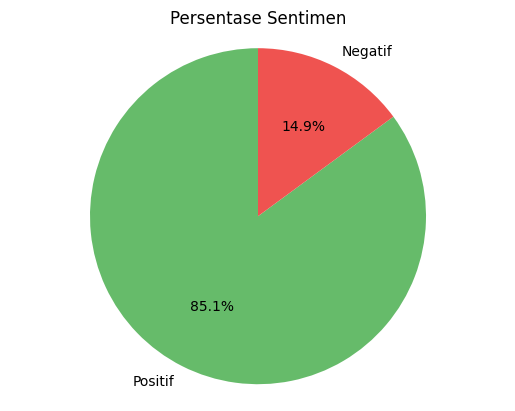

In [21]:
import matplotlib.pyplot as plt



# Menghitung jumlah sentimen positif dan negatif
positif_count = my_df[my_df['Label'] == 'Positif'].shape[0]
negatif_count = my_df[my_df['Label'] == 'Negatif'].shape[0]

# Data untuk diagram lingkaran
labels = ['Positif', 'Negatif']
sizes = [positif_count, negatif_count]

# Warna
colors = ['#66bb6a', '#ef5350']

# Pengaturan plot
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Pengaturan tambahan
ax.axis('equal')  # Agar diagram lingkaran terlihat bulat

# Judul diagram
plt.title('Persentase Sentimen')

# Tampilkan diagram lingkaran
plt.show()

**2. PRE PROCESSING**

**CLEANING**

In [22]:
pd.set_option('display.max_columns', None)
my_df=my_df[['content','Label']]
my_df.head(10)

,content,Label
0,Bagus banget,Positif
1,kgn yusak☹️,Positif
2,pengguna baru,Positif
3,Tambahkan kualitas ultra tinggi video dengan b...,Positif
4,masih belom mengerti jd baru mencoba nya,Positif
6,Oke juga,Positif
8,Aplikasi sampah. Maksa buat instal dengan panc...,Negatif
9,Oke juga,Positif
10,seru,Positif
11,ok,Positif


**CASE FOLDING**

In [23]:
import re
def  clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    # remove numbers
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return my_df

In [24]:
my_df['text_clean'] = my_df['content'].str.lower()
my_df['text_clean']
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head(10)

,content,Label,text_clean
0,Bagus banget,Positif,bagus banget
1,kgn yusak☹️,Positif,kgn yusak
2,pengguna baru,Positif,pengguna baru
3,Tambahkan kualitas ultra tinggi video dengan b...,Positif,tambahkan kualitas ultra tinggi video dengan b...
4,masih belom mengerti jd baru mencoba nya,Positif,masih belom mengerti jd baru mencoba nya
6,Oke juga,Positif,oke juga
8,Aplikasi sampah. Maksa buat instal dengan panc...,Negatif,aplikasi sampah maksa buat instal dengan panci...
9,Oke juga,Positif,oke juga
10,seru,Positif,seru
11,ok,Positif,ok


**STOPWORD REMOVAL**

In [25]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
data_clean['text_StopWord'] = data_clean['text_clean'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,content,Label,text_clean,text_StopWord
0,Bagus banget,Positif,bagus banget,bagus banget
1,kgn yusak☹️,Positif,kgn yusak,kgn yusak
2,pengguna baru,Positif,pengguna baru,pengguna
3,Tambahkan kualitas ultra tinggi video dengan b...,Positif,tambahkan kualitas ultra tinggi video dengan b...,tambahkan kualitas ultra video blu ray k
4,masih belom mengerti jd baru mencoba nya,Positif,masih belom mengerti jd baru mencoba nya,belom mengerti jd mencoba nya
6,Oke juga,Positif,oke juga,oke
8,Aplikasi sampah. Maksa buat instal dengan panc...,Negatif,aplikasi sampah maksa buat instal dengan panci...,aplikasi sampah maksa instal pancingan posting...
9,Oke juga,Positif,oke juga,oke
10,seru,Positif,seru,seru
11,ok,Positif,ok,ok


**TOKENIZING**

In [26]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_StopWord'].apply(lambda x: word_tokenize(x))
data_clean.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,content,Label,text_clean,text_StopWord,text_tokens
0,Bagus banget,Positif,bagus banget,bagus banget,"[bagus, banget]"
1,kgn yusak☹️,Positif,kgn yusak,kgn yusak,"[kgn, yusak]"
2,pengguna baru,Positif,pengguna baru,pengguna,[pengguna]
3,Tambahkan kualitas ultra tinggi video dengan b...,Positif,tambahkan kualitas ultra tinggi video dengan b...,tambahkan kualitas ultra video blu ray k,"[tambahkan, kualitas, ultra, video, blu, ray, k]"
4,masih belom mengerti jd baru mencoba nya,Positif,masih belom mengerti jd baru mencoba nya,belom mengerti jd mencoba nya,"[belom, mengerti, jd, mencoba, nya]"


**STEMMING**

In [27]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.9 MB/s eta 0:00:00


In [28]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [29]:
#-----------------STEMMING -----------------
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung=0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung+=1
    print(hitung,":",term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]


#script ini bisa dipisah dari eksekusinya setelah pembacaaan term selesai
data_clean['text_steamindo'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head(10)

1429
------------------------
1 : bagus : bagus
2 : banget : banget
3 : kgn : kgn
4 : yusak : yusak
5 : pengguna : guna
6 : tambahkan : tambah
7 : kualitas : kualitas
8 : ultra : ultra
9 : video : video
10 : blu : blu
11 : ray : ray
12 : k : k
13 : belom : bom
14 : mengerti : erti
15 : jd : jd
16 : mencoba : coba
17 : nya : nya
18 : oke : oke
19 : aplikasi : aplikasi
20 : sampah : sampah
21 : maksa : maksa
22 : instal : instal
23 : pancingan : pancing
24 : postingan : postingan
25 : instagram : instagram
26 : yg : yg
27 : lengkap : lengkap
28 : benarbenar : benarbenar
29 : samph : samph
30 : seru : seru
31 : ok : ok
32 : pengalaman : alam
33 : terindah : indah
34 : bgt : bgt
35 : download : download
36 : suka : suka
37 : mantap : mantap
38 : yeek : yeek
39 : mudah : mudah
40 : penggunaanyasimpel : penggunaanyasimpel
41 : terhubung : hubung
42 : tersinkron : sinkron
43 : family : family
44 : grup : grup
45 : laman : laman
46 : cepat : cepat
47 : rahasia : rahasia
48 : aman : aman
49 : b

,content,Label,text_clean,text_StopWord,text_tokens,text_steamindo
0,Bagus banget,Positif,bagus banget,bagus banget,"[bagus, banget]",bagus banget
1,kgn yusak☹️,Positif,kgn yusak,kgn yusak,"[kgn, yusak]",kgn yusak
2,pengguna baru,Positif,pengguna baru,pengguna,[pengguna],guna
3,Tambahkan kualitas ultra tinggi video dengan b...,Positif,tambahkan kualitas ultra tinggi video dengan b...,tambahkan kualitas ultra video blu ray k,"[tambahkan, kualitas, ultra, video, blu, ray, k]",tambah kualitas ultra video blu ray k
4,masih belom mengerti jd baru mencoba nya,Positif,masih belom mengerti jd baru mencoba nya,belom mengerti jd mencoba nya,"[belom, mengerti, jd, mencoba, nya]",bom erti jd coba nya
6,Oke juga,Positif,oke juga,oke,[oke],oke
8,Aplikasi sampah. Maksa buat instal dengan panc...,Negatif,aplikasi sampah maksa buat instal dengan panci...,aplikasi sampah maksa instal pancingan posting...,"[aplikasi, sampah, maksa, instal, pancingan, p...",aplikasi sampah maksa instal pancing postingan...
9,Oke juga,Positif,oke juga,oke,[oke],oke
10,seru,Positif,seru,seru,[seru],seru
11,ok,Positif,ok,ok,[ok],ok


In [30]:
data_clean.to_csv('Hasil_TextPreProcessing_Threads.csv', index= False)

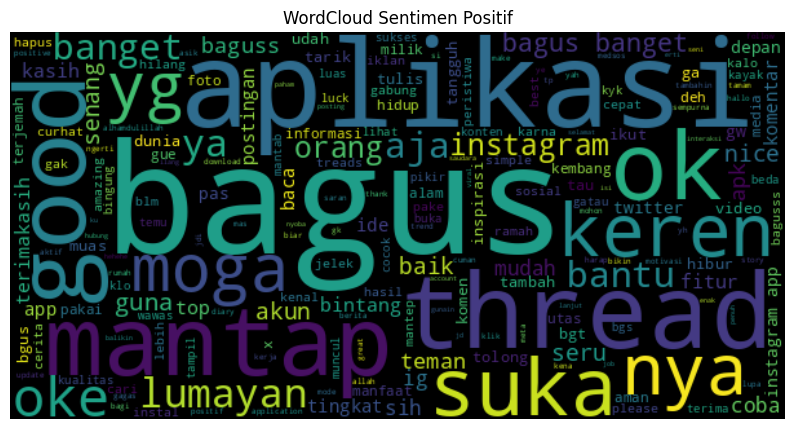

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua teks dengan sentimen positif menjadi satu string
text_positive = ' '.join(data_clean[data_clean['Label'] == 'Positif']['text_steamindo'])


# Membuat WordCloud
wordcloud = WordCloud(width=600, height=300, background_color='black').generate(text_positive)

# Plot WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Positif')
plt.show()

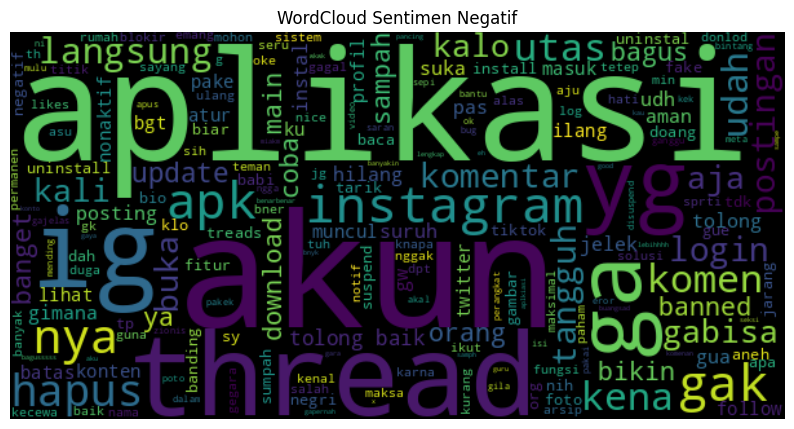

In [32]:
# Menggabungkan semua teks dengan sentimen Negatif menjadi satu string
text_positive = ' '.join(data_clean[data_clean['Label'] == 'Negatif']['text_steamindo'])


# Membuat WordCloud
wordcloud = WordCloud(width=600, height=300, background_color='black').generate(text_positive)

# Plot WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Negatif')
plt.show()

**3. MEMECAH DATA MENJADI DATA LATIH DAN DATA PREDIKSI**

In [33]:
import re
def praproses(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)()(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

In [34]:
#membagi data menjadi data training dan testing dengan test_size = 0.20 dan random state nya 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean['content'], data_clean['Label'],
                                                    test_size = 0.20,
                                                    random_state = 0)

In [35]:
#PEMBOBOTAN
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [36]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(751,)
(751,)
(188,)
(188,)


In [37]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [38]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [39]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(tfidf_train, y_train)

MultinomialNB()

In [40]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [41]:
y_pred = nb.predict(tfidf_test)

**4. MENGHITUNG AKURASI**

In [42]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

In [43]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print("MultinomialNB Accuracy:", accuracy_score(y_test,predicted))
print("MultinomialNB Precision:", precision_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB Recall:", recall_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB f1_score:", f1_score(y_test,predicted, average="binary", pos_label="Negatif"))

print(f'confusion_matrix:\n {confusion_matrix(y_test, predicted)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

# Load dataset
data_clean = pd.read_csv('Hasil_TextPreProcessing_Threads.csv')

MultinomialNB Accuracy: 0.8936170212765957
MultinomialNB Precision: 0.875
MultinomialNB Recall: 0.4375
MultinomialNB f1_score: 0.5833333333333334
confusion_matrix:
 [[ 14  18]
 [  2 154]]

              precision    recall  f1-score   support

     Negatif       0.88      0.44      0.58        32
     Positif       0.90      0.99      0.94       156

    accuracy                           0.89       188
   macro avg       0.89      0.71      0.76       188
weighted avg       0.89      0.89      0.88       188



<ipython-input-44-813a5fade6db>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=metrics_df, palette='Set2')


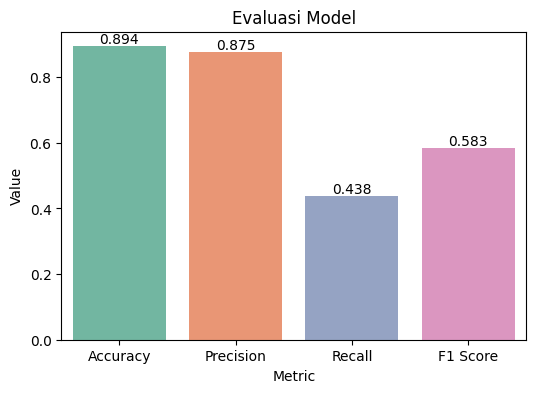

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Metrik evaluasi
accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted, average="binary", pos_label="Negatif")
recall = recall_score(y_test, predicted, average="binary", pos_label="Negatif")
f1 = f1_score(y_test, predicted, average="binary", pos_label="Negatif")

# Menyimpan metrik evaluasi dalam sebuah DataFrame
metrics_df = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                           'Value': [accuracy, precision, recall, f1]})

# Membuat grafik batang
plt.figure(figsize=(6, 4))
sns.barplot(x='Metric', y='Value', data=metrics_df, palette='Set2')
plt.title('Evaluasi Model')
plt.xlabel('Metric')
plt.ylabel('Value')

# Menampilkan nilai di atas setiap batang
for i, value in enumerate(metrics_df['Value']):
    plt.text(i, value, round(value, 3), ha='center', va='bottom')

# Tampilkan grafik
plt.show()

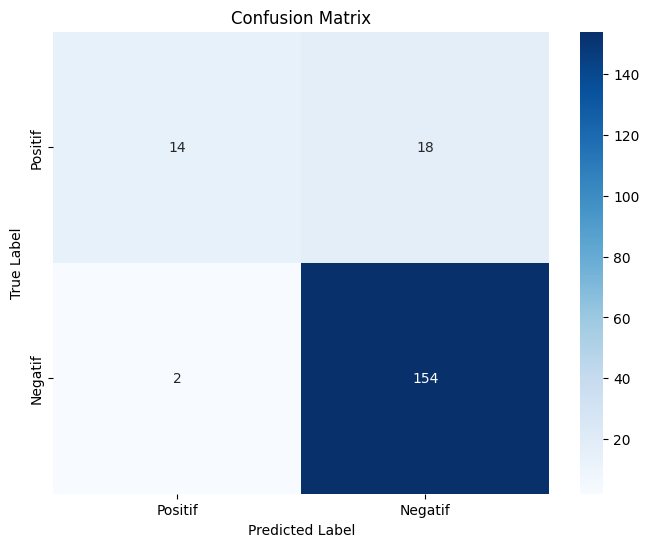

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predicted)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Positif","Negatif"], yticklabels=["Positif","Negatif"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()